# Lead Scoring Case Study

### Step-1: Importing the Data

In [1]:
# Importing Numpy and Pandas

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the Data set

lead_score=pd.read_csv('Leads.csv')


### Step-2: Inspecting the Dataframe

In [3]:
# let's see the head

lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the Dimensions

lead_score.shape

(9240, 37)

In [5]:
# Looking for some statistical insights using describe function

lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# column info

lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step-3: Data Cleaning

In [8]:
# There are some select values in the dataset, so we have to replace the select values with nan values.

lead_score=lead_score.replace('select',np.nan )
lead_score=lead_score.replace('Select',np.nan )


In [9]:
# checking the unique value coulmns

lead_score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Here we see that some of the columns have unique values , so we don't need these columns.

In [10]:
# removing the unique values columns

lead_score.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [11]:
lead_score.shape

(9240, 32)

In [12]:
# Checking for null_values now.

round(lead_score.isnull().sum()/len(lead_score)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

According to the Industry standards, If there are more than 30 % null - values in any column , then we have to drop that column.

In [13]:
# Dropping the columns

lead_score.drop(['How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
                'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [14]:
lead_score.shape

(9240, 23)

In [15]:
# Rechecking the null_values

round(lead_score.isnull().sum()/len(lead_score)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Here we see that some of the nukk vakues are still there , As these columns are so important , we cannot Drop these values in
the columns so we have to impute the null values with some logical values.

In [16]:
# Here we cannot impute the mode because mode values doesn't make any sense for these columns. So we can replace the
# null values with 'unknown'

lead_score['Country']=lead_score['Country'].fillna('Unknown')
lead_score['Specialization']=lead_score['Specialization'].fillna('Unknown')
lead_score['What is your current occupation']=lead_score['What is your current occupation'].fillna('Unknown')
lead_score['What matters most to you in choosing a course']=lead_score['What matters most to you in choosing a course'].fillna('Unknown')

In [17]:
lead_score.shape

(9240, 23)

In [18]:
lead_score.Country.value_counts()

India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Sweden                     3
Italy                      2
Uganda                     2
Netherlands                2
Bangladesh                 2
Philippines                2
Asia/Pacific Region        2
Belgium                    2
Ghana                      2
China                      2
Malaysia                   1
Indonesia                  1
Kenya                      1
Russia                     1
Tanzania                   1
Vietnam       

In [19]:
# Rechcking the null values.

round(lead_score.isnull().sum()/len(lead_score)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [20]:
# Checking the percent of lose if the null values are removed. Here we are checking for all the columns using axis=1

round(100*(sum(lead_score.isnull().sum(axis=1) > 1)/lead_score.shape[0]),2)

1.48

In [21]:
lead_score = lead_score[lead_score.isnull().sum(axis=1) <1]


In [22]:
# Rechecking the percentage of missing values

round(100*(lead_score.isnull().sum()/len(lead_score)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [23]:
lead_score.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

Now our Data is Free from Null Values.

### Step-4: Data Visualization

In [24]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [25]:
# Removing the Unwanted Columns

lead_score.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [26]:
lead_score.shape

(9074, 21)

In [27]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [28]:
# Importing the necessary Libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Uni-Variate Analysis (Categorical Variable)

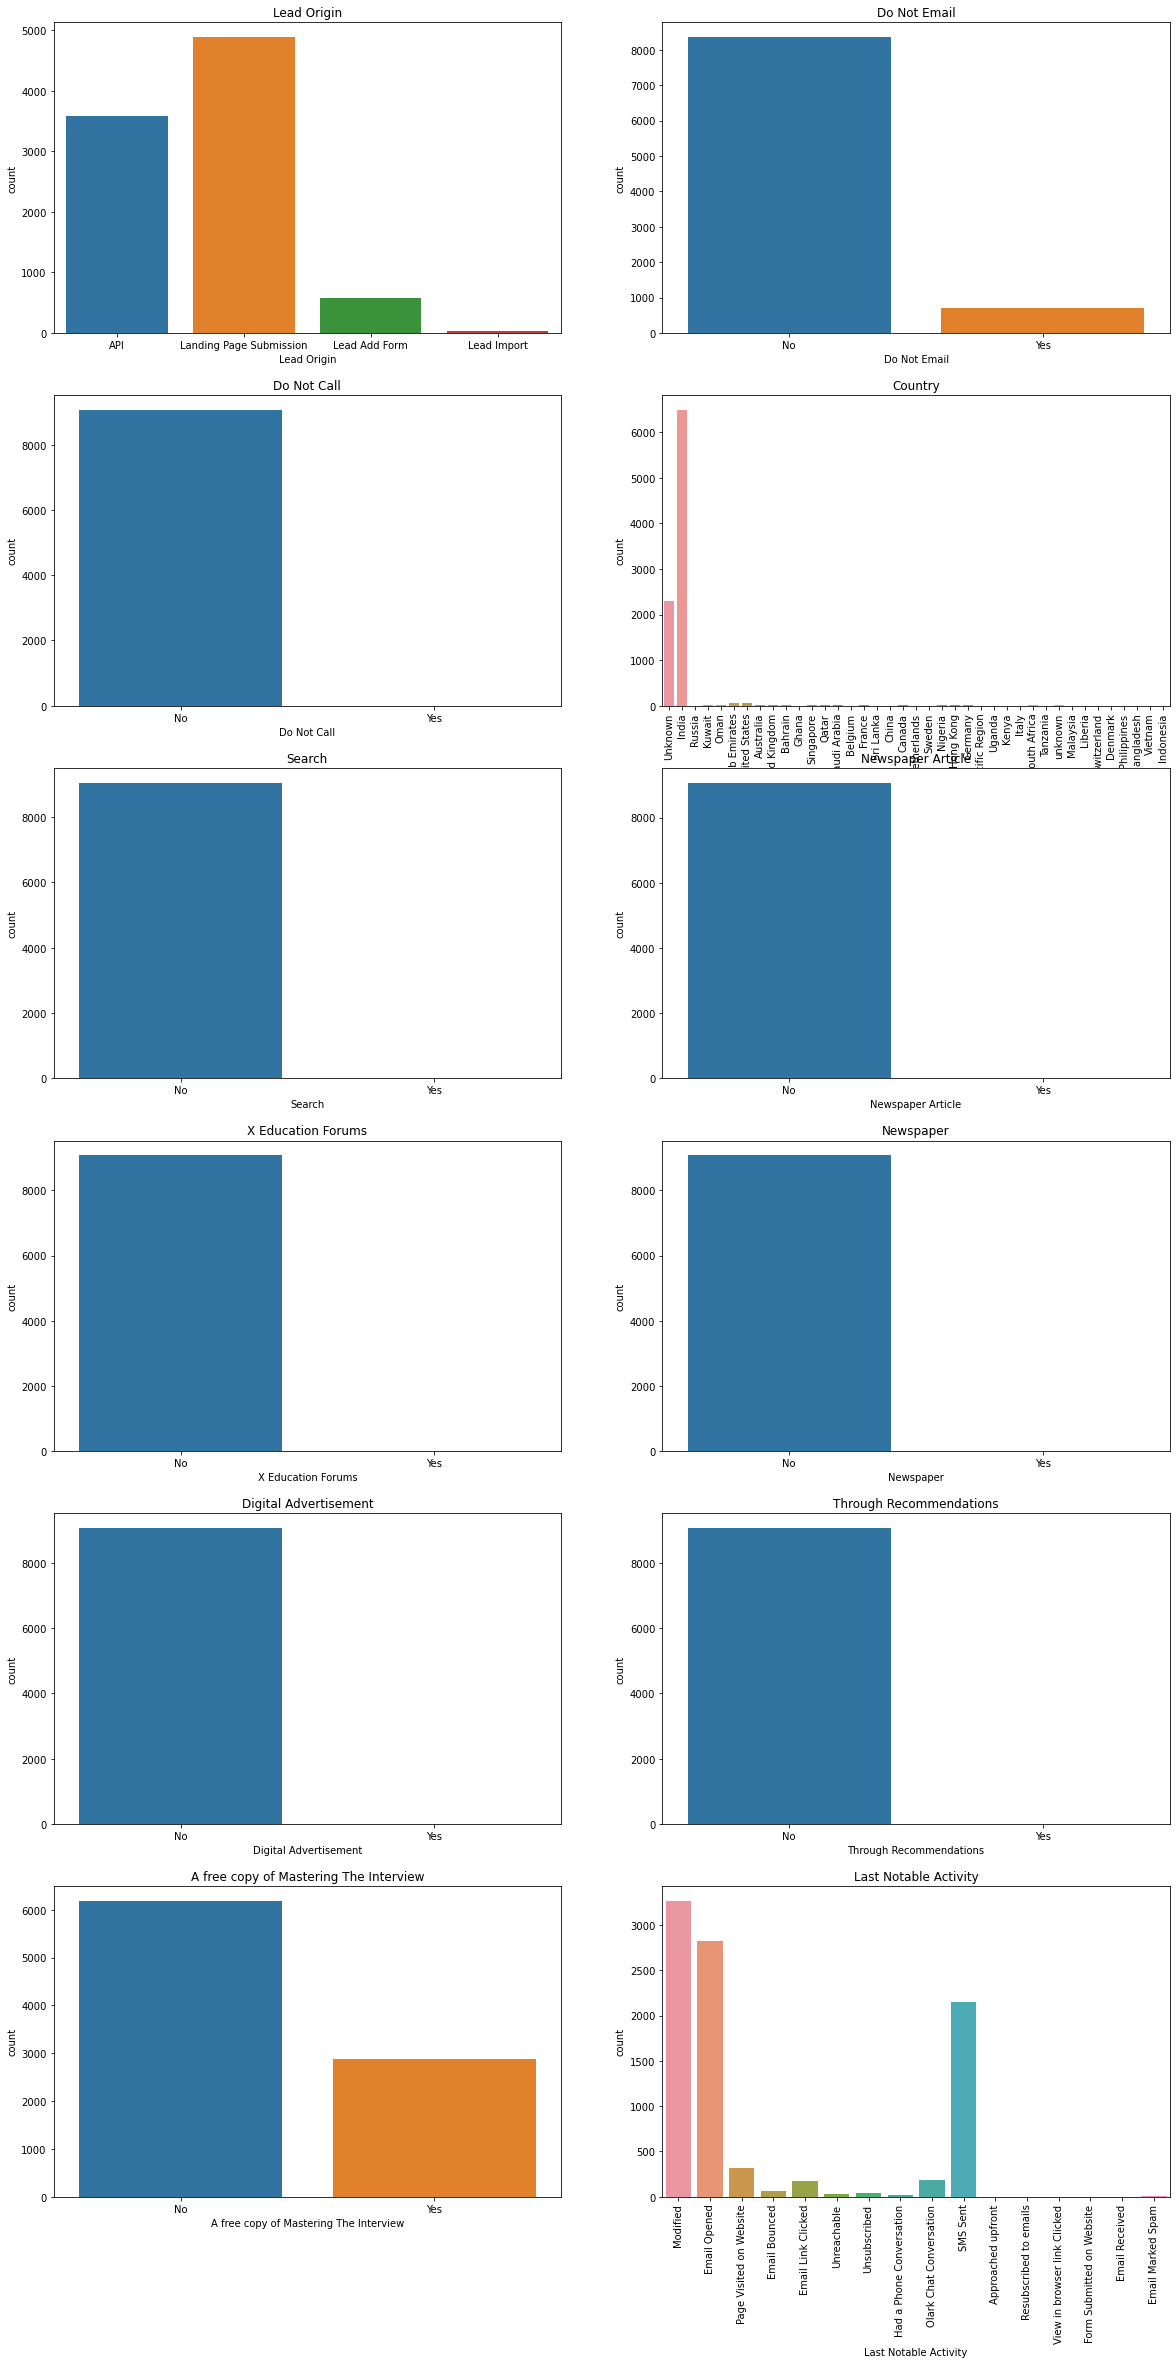

In [29]:
# ploting the countplot

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_score['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_score['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead_score['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_score['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead_score['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_score['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_score['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_score['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_score['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_score['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_score['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_score['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


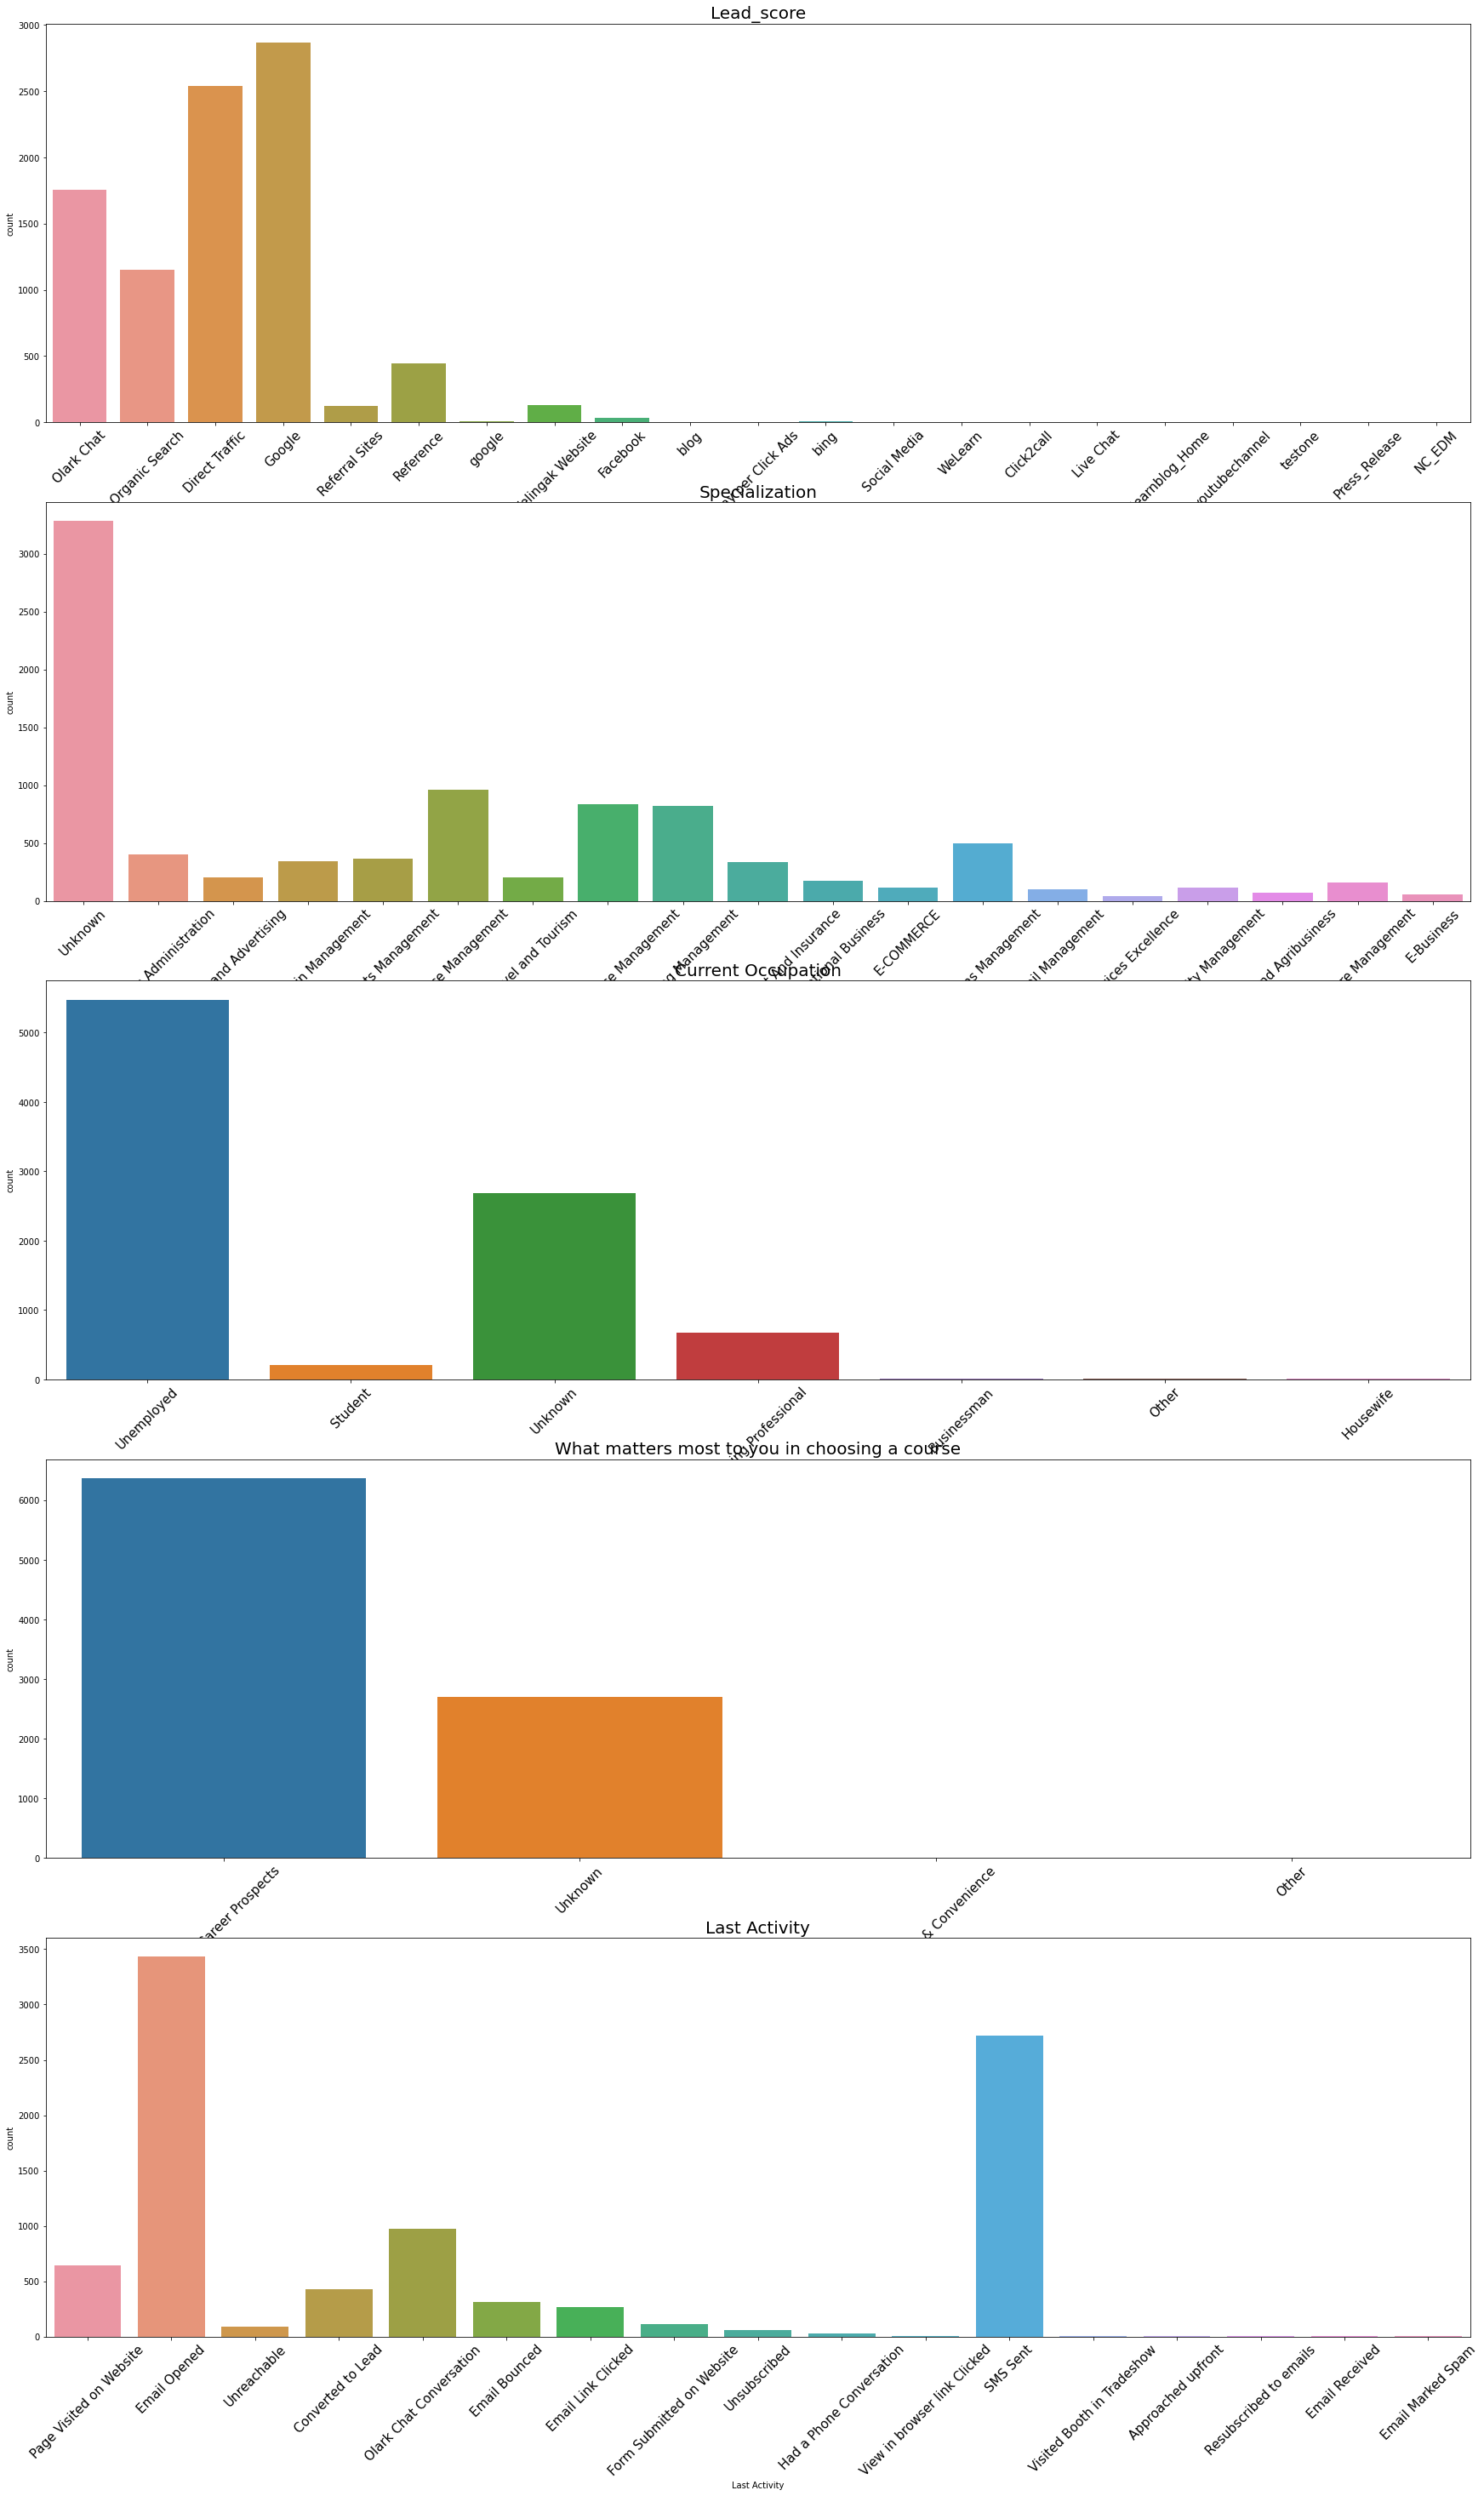

In [30]:
# Countplot of Left categorical column

plt.figure(figsize=(30,50))
plt.subplot(5,1,1)
sns.countplot(lead_score['Lead Source']).tick_params(axis='x', rotation = 45,labelsize=15)
plt.title('Lead_score', fontsize=20)

plt.subplot(5,1,2)
sns.countplot(lead_score['Specialization']).tick_params(axis='x', rotation = 45,labelsize=15)
plt.title('Specialization',fontsize=20)

plt.subplot(5,1,3)
sns.countplot(lead_score['What is your current occupation']).tick_params(axis='x', rotation = 45,labelsize=15)
plt.title('Current Occupation',fontsize=20)

plt.subplot(5,1,4)
sns.countplot(lead_score['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 45,labelsize=15)
plt.title('What matters most to you in choosing a course',fontsize=20)

plt.subplot(5,1,5)
sns.countplot(lead_score['Last Activity']).tick_params(axis='x', rotation = 45,labelsize=15)
plt.title('Last Activity',fontsize=20)
plt.show()

### Uni-Variate Analysis(Numeric Variable)


In [31]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

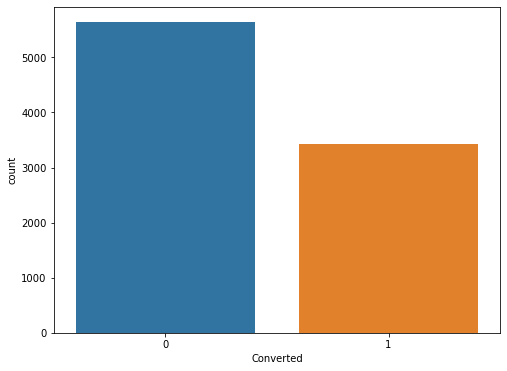

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(lead_score['Converted'])
plt.show()

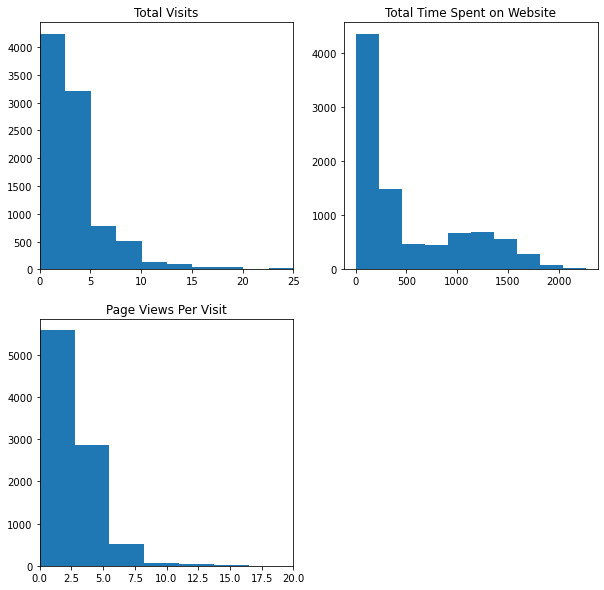

In [33]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_score['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)


plt.subplot(222)
plt.hist(lead_score['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_score['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Multi-Variate Analysis

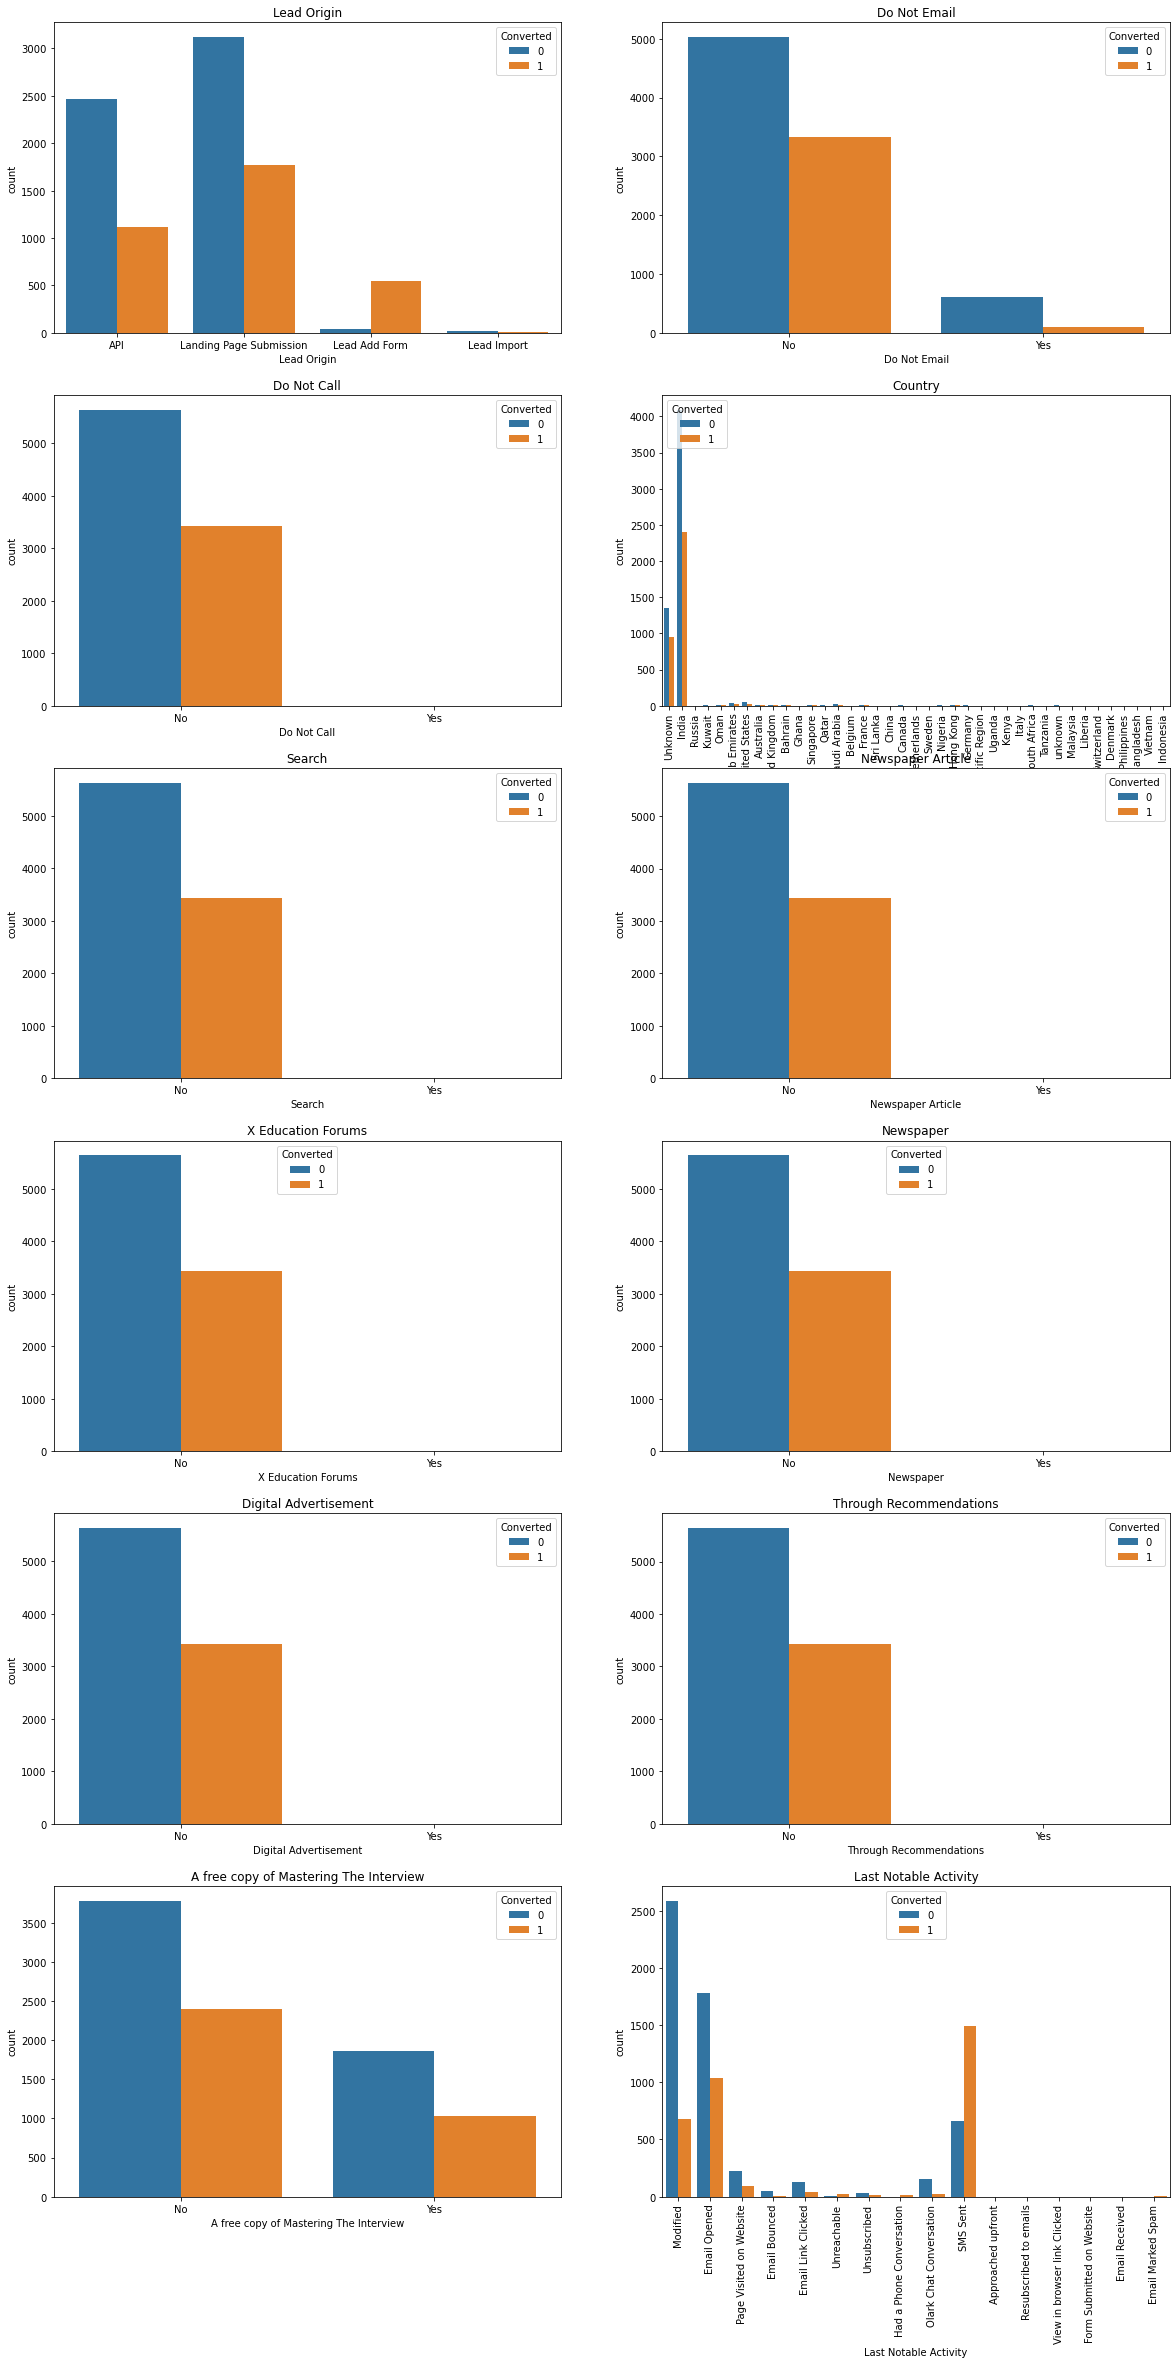

In [34]:
# Multivariate analyis of categorical column with respect to Converted (Target Column)

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x='Lead Origin',hue='Converted',data=lead_score)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x='Do Not Email',hue='Converted',data=lead_score)
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Call',hue='Converted',data=lead_score)
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x='Country',hue='Converted',data=lead_score).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(x='Search',hue='Converted',data=lead_score)
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(x='Newspaper Article',hue='Converted',data=lead_score)
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(x='X Education Forums',hue='Converted',data=lead_score)
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(x='Newspaper',hue='Converted',data=lead_score)
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(x='Digital Advertisement',hue='Converted',data=lead_score)
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(x='Through Recommendations',hue='Converted',data=lead_score)
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead_score)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead_score).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


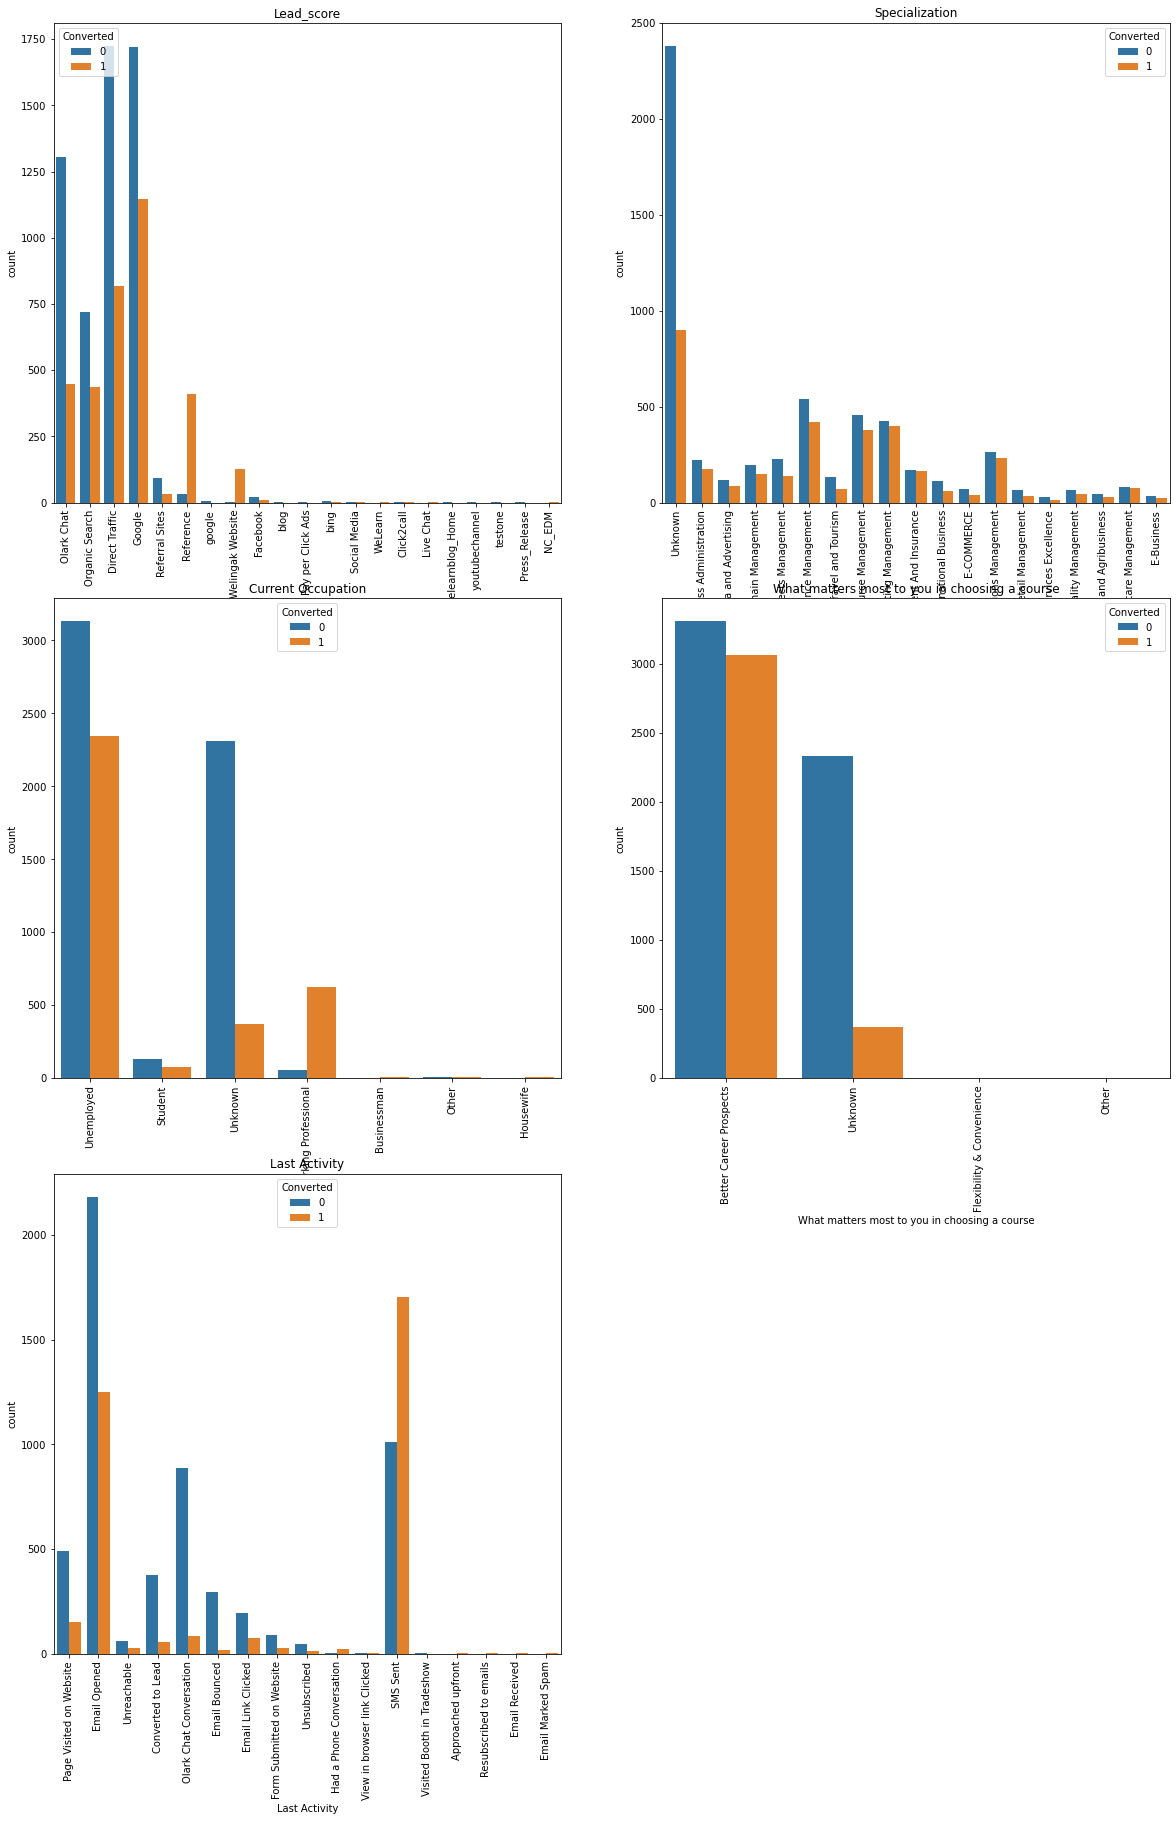

In [35]:
# Multivariate analyis of categorical column with respect to Converted (Target Column)

plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
sns.countplot(x='Lead Source',hue='Converted',data=lead_score).tick_params(axis='x', rotation = 90,labelsize=10)
plt.title('Lead_score')

plt.subplot(3,2,2)
sns.countplot(x='Specialization',hue='Converted',data=lead_score).tick_params(axis='x', rotation = 90,labelsize=10)
plt.title('Specialization')

plt.subplot(3,2,3)
sns.countplot(x='What is your current occupation',hue='Converted',data=lead_score).tick_params(axis='x', rotation = 90,labelsize=10)
plt.title('Current Occupation')

plt.subplot(3,2,4)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead_score).tick_params(axis='x', rotation = 90,labelsize=10)
plt.title('What matters most to you in choosing a course')

plt.subplot(3,2,5)
sns.countplot(x='Last Activity',hue='Converted',data=lead_score).tick_params(axis='x', rotation = 90,labelsize=10)
plt.title('Last Activity')
plt.show()

In [36]:
# Finding the Correlation for numerical varibale

lead_score.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


<AxesSubplot:>

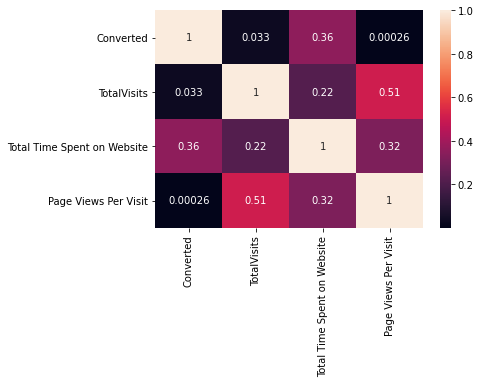

In [37]:
# Making Heatmaps of Corr

sns.heatmap(lead_score.corr(),annot=True)

### Step-4: Data Preparation
##### Creating Dummy Varibale

In [38]:
# First we have to look for the categorical columns:

lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [39]:
#1. Finding the categorical columns


lead_score.loc[:, lead_score.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# If any binary categorial varibale is there just convert the Yes to 1 and No to 0


varlist =  ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the varlist
lead_score[varlist] = lead_score[varlist].apply(binary_map)

In [41]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


In [42]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead_score[['Lead Origin','Specialization' ,'Lead Source', 'Country', 'Last Activity', 'What is your current occupation',
                                   'What matters most to you in choosing a course', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_score_final = pd.concat([lead_score, dummy], axis=1)
lead_score_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [43]:
lead_score_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 140 entries, Lead Origin to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(11), object(8), uint8(119)
memory usage: 2.9+ MB


In [44]:
# Dropping the Columns

lead_score_final.drop(['Lead Origin','Specialization' ,'Lead Source', 'Country', 'Last Activity', 'What is your current occupation',
                                   'What matters most to you in choosing a course', 'Last Notable Activity'],axis=1,inplace=True)

In [45]:
lead_score_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 132 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(11), uint8(119)
memory usage: 2.3 MB


In [46]:
lead_score_final

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,1,8.0,1845,2.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,2.0,238,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,2.0,199,2.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0,0,1,3.0,499,3.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
lead_score_final.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000110,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.014845,0.010498,0.010498,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step-5: Train - Test split

In [48]:
# Importing the Library

from sklearn.model_selection import train_test_split

In [49]:
# Putting feature variable to X.

X=lead_score_final.drop(['Converted'],1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# Putting the target variable to y.

y=lead_score_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step-6: Feature Scaling


In [52]:
# Importing Min_Max_scaler

from sklearn.preprocessing import MinMaxScaler

In [53]:
# Scaling the Numeric column

scaler=MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                                'Page Views Per Visit',
                                                                                                                'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.007968,0.178347,0.083333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.007968,0.085355,0.083333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.007968,0.619946,0.083333,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.019920,0.711590,0.104167,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step-7: Looking For Correlation

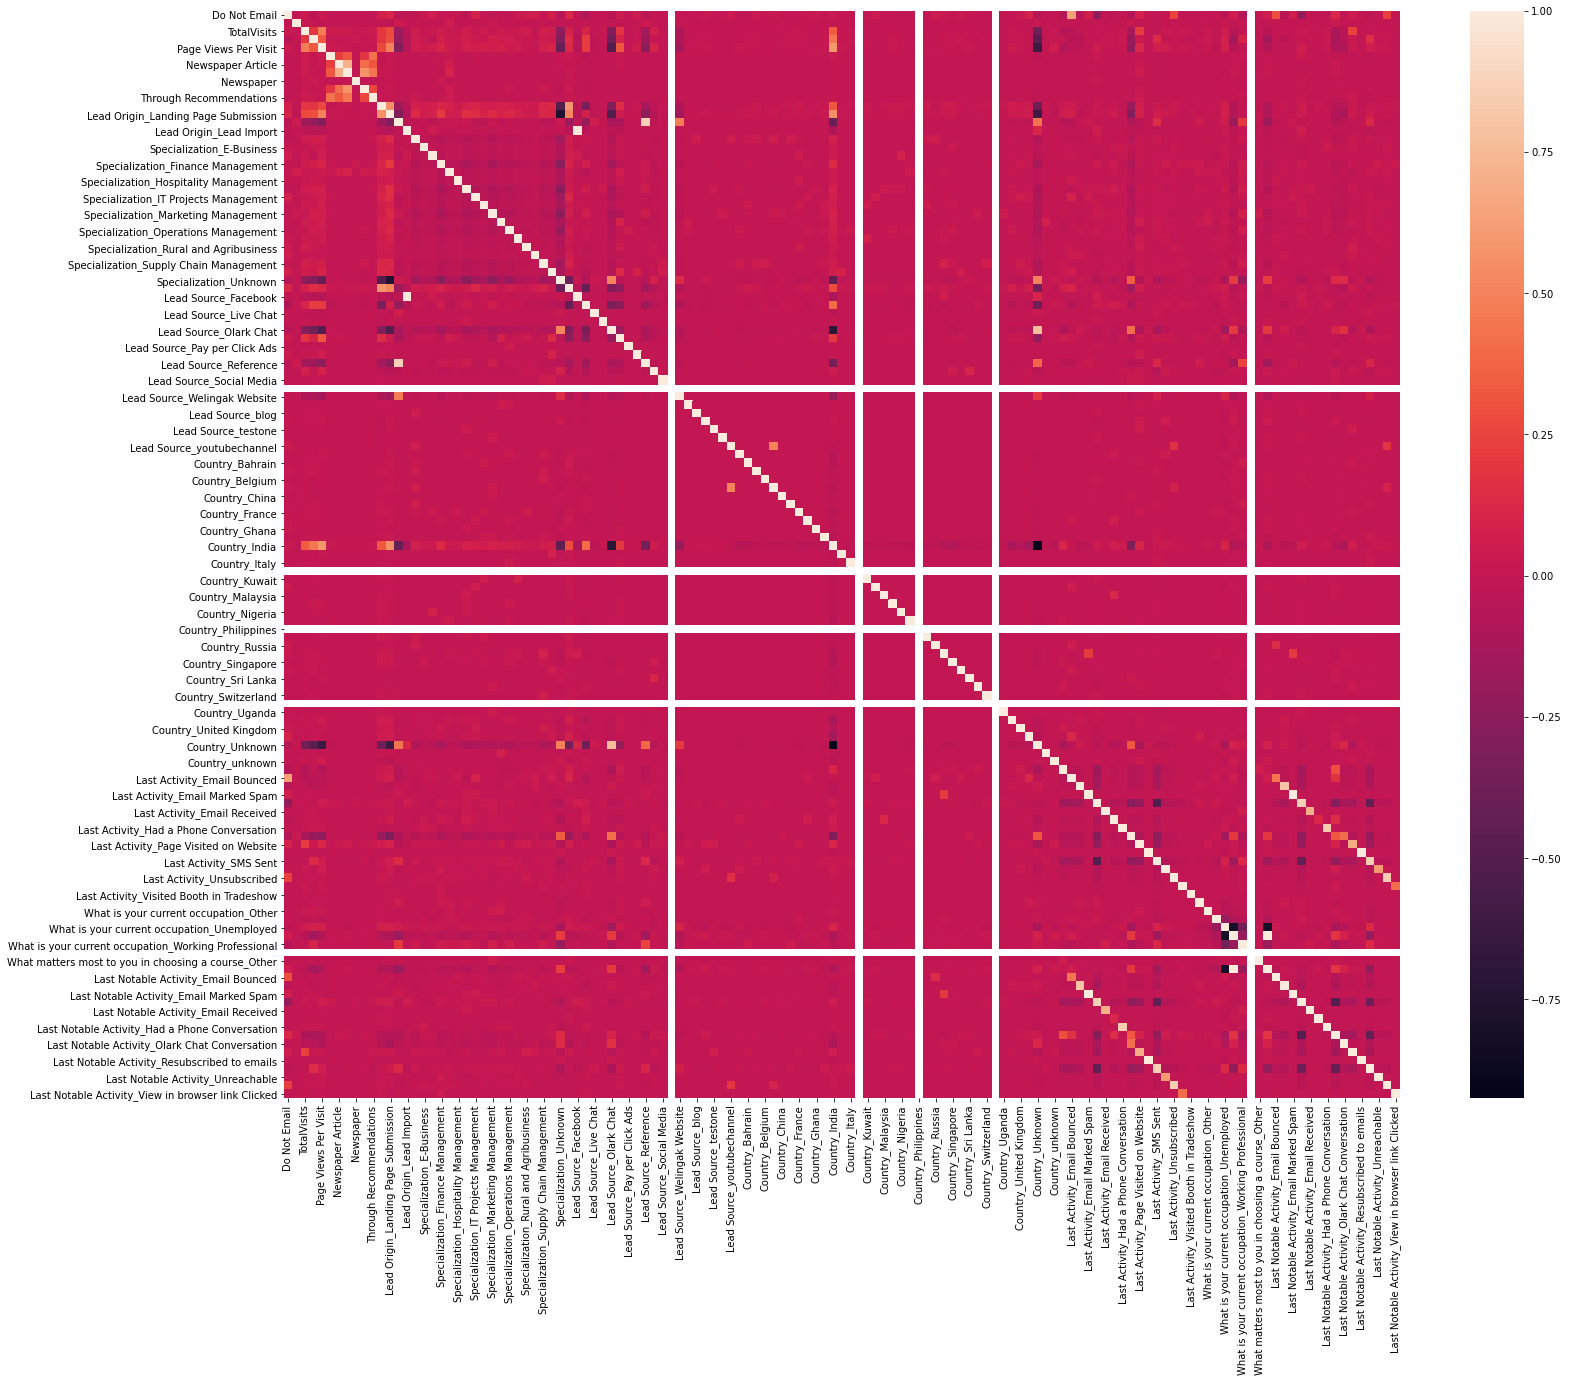

In [54]:
plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr())
plt.show()

### Step-8: Model Building

In [55]:
# Importing Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [56]:
# Import RFE

from sklearn.feature_selection import RFE

In [57]:
# Running RFE taking 15 best varibale

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [58]:
# Features that are selected by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 31),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Search', False, 81),
 ('Newspaper Article', False, 24),
 ('X Education Forums', False, 70),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 82),
 ('Through Recommendations', False, 68),
 ('A free copy of Mastering The Interview', False, 77),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 78),
 ('Specialization_Business Administration', False, 86),
 ('Specialization_E-Business', False, 52),
 ('Specialization_E-COMMERCE', False, 72),
 ('Specialization_Finance Management', False, 105),
 ('Specialization_Healthcare Management', False, 104),
 ('Specialization_Hospitality Management', False, 34),
 ('Specialization_Human Resource Management', False, 96),
 ('Specialization_IT Projects Management', False, 106),
 ('Specialization_Internati

In [59]:
# Extracting all the columns of rfe_support in the 'col'  varibale.

col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Country_Unknown',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [60]:
# Now building model on the varibales selected by RFE.

X_train=X_train[col]

In [61]:
# Building model using Stats_model 
# Importing the Statsmodel

import statsmodels.api as sm

In [62]:
# Model building

X_train_sm=sm.add_constant(X_train)
logm1=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.1
Date:                Tue, 05 Oct 2021   Deviance:                       5158.2
Time:                        12:13:25   Pearson chi2:                 6.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.0585      0.103    -20.046      0.000      -2.260      -1.857
Do Not Email                                             -1.6072      0.175     -9.181      0.000      -1.950      -1.264
TotalVisits                                               9.1899      2.158      4.259      0.000       4.960      13.420
Total Time Spent on Website                               4.6791      0.168     27.793      0.000       4.349       5.009
Lead Origin_Landing Page Submission                      -0.3985      0.087     -4.558      0.000      -0.570      -0.227
Lead Origin_Lead Add Form                                 2.2224      0.228      9.752      0.000       1.776       2.669
Lead Source_Welingak Website                              1.9682      0.751      2.620      0.009       0.496       3.441
Country_Unknown                                           1.3445      0.125     10.786      0.000       1.100       1.589
Last Activity_Had a Phone Conversation                    1.1407      1.176      0.970      0.332      -1.165       3.446
Last Activity_Olark Chat Conversation                    -1.3408      0.165     -8.141      0.000      -1.664      -1.018
Last Activity_SMS Sent                                    1.3289      0.075     17.689      0.000       1.182       1.476
What is your current occupation_Housewife                22.9396   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Working Professional      2.4712      0.188     13.162      0.000       2.103       2.839
What matters most to you in choosing a course_Unknown    -1.3120      0.088    -14.863      0.000      -1.485      -1.139
Last Notable Activity_Had a Phone Conversation            2.5391      1.632      1.556      0.120      -0.660       5.738
Last Notable Activity_Unreachable                         2.0864      0.495      4.211      0.000       1.115       3.058
=========================================================================================================================
"""

In [63]:
# Importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Dealing with Multicollinearity using VIF.

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,3.41
13,Last Notable Activity_Had a Phone Conversation,3.40
3,Lead Origin_Landing Page Submission,2.21
6,Country_Unknown,2.05
2,Total Time Spent on Website,1.92
4,Lead Origin_Lead Add Form,1.89
1,TotalVisits,1.55
9,Last Activity_SMS Sent,1.53
12,What matters most to you in choosing a course_...,1.46
8,Last Activity_Olark Chat Conversation,1.40


In [65]:
# Now removing all the columns having high p-value as well as high VIFs.
# Dropping (Last Notable Activity_Resubscribed to emails) column

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


In [66]:
# Refiting the model

X_train_sm=sm.add_constant(X_train)
logm2=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.1
Date:                Tue, 05 Oct 2021   Deviance:                       5168.1
Time:                        12:13:26   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.0492      0.102    -20.008      0.000      -2.250      -1.848
Do Not Email                                             -1.6103      0.175     -9.199      0.000      -1.953      -1.267
TotalVisits                                               9.1025      2.153      4.228      0.000       4.883      13.322
Total Time Spent on Website                               4.6735      0.168     27.809      0.000       4.344       5.003
Lead Origin_Landing Page Submission                      -0.3971      0.087     -4.549      0.000      -0.568      -0.226
Lead Origin_Lead Add Form                                 2.2576      0.227      9.924      0.000       1.812       2.704
Lead Source_Welingak Website                              1.9348      0.751      2.575      0.010       0.462       3.407
Country_Unknown                                           1.3361      0.124     10.746      0.000       1.092       1.580
Last Activity_Had a Phone Conversation                    1.1351      1.176      0.965      0.334      -1.170       3.440
Last Activity_Olark Chat Conversation                    -1.3430      0.165     -8.155      0.000      -1.666      -1.020
Last Activity_SMS Sent                                    1.3229      0.075     17.622      0.000       1.176       1.470
What is your current occupation_Working Professional      2.4652      0.188     13.132      0.000       2.097       2.833
What matters most to you in choosing a course_Unknown    -1.3144      0.088    -14.898      0.000      -1.487      -1.142
Last Notable Activity_Had a Phone Conversation            2.5375      1.632      1.555      0.120      -0.661       5.736
Last Notable Activity_Unreachable                         2.0808      0.496      4.199      0.000       1.110       3.052
=========================================================================================================================
"""

In [67]:
# Recalculating

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,3.41
12,Last Notable Activity_Had a Phone Conversation,3.40
3,Lead Origin_Landing Page Submission,2.21
6,Country_Unknown,2.05
2,Total Time Spent on Website,1.92
4,Lead Origin_Lead Add Form,1.89
1,TotalVisits,1.55
9,Last Activity_SMS Sent,1.53
11,What matters most to you in choosing a course_...,1.46
8,Last Activity_Olark Chat Conversation,1.40


In [68]:
# Dropping ('Last Activity_Had a Phone Conversation')

X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)



In [69]:
# Refiting the model

X_train_sm=sm.add_constant(X_train)
logm3=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.5
Date:                Tue, 05 Oct 2021   Deviance:                       5169.1
Time:                        12:13:26   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.0456      0.102    -19.991      0.000      -2.246      -1.845
Do Not Email                                             -1.6098      0.175     -9.194      0.000      -1.953      -1.267
TotalVisits                                               9.1270      2.154      4.238      0.000       4.906      13.348
Total Time Spent on Website                               4.6749      0.168     27.821      0.000       4.346       5.004
Lead Origin_Landing Page Submission                      -0.4001      0.087     -4.587      0.000      -0.571      -0.229
Lead Origin_Lead Add Form                                 2.2567      0.227      9.920      0.000       1.811       2.703
Lead Source_Welingak Website                              1.9349      0.751      2.575      0.010       0.462       3.407
Country_Unknown                                           1.3338      0.124     10.730      0.000       1.090       1.577
Last Activity_Olark Chat Conversation                    -1.3449      0.165     -8.167      0.000      -1.668      -1.022
Last Activity_SMS Sent                                    1.3212      0.075     17.604      0.000       1.174       1.468
What is your current occupation_Working Professional      2.4639      0.188     13.125      0.000       2.096       2.832
What matters most to you in choosing a course_Unknown    -1.3160      0.088    -14.918      0.000      -1.489      -1.143
Last Notable Activity_Had a Phone Conversation            3.6713      1.133      3.240      0.001       1.450       5.892
Last Notable Activity_Unreachable                         2.0793      0.496      4.196      0.000       1.108       3.051
=========================================================================================================================
"""

In [70]:
# Recalculating

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.21
6,Country_Unknown,2.05
2,Total Time Spent on Website,1.92
4,Lead Origin_Lead Add Form,1.89
1,TotalVisits,1.55
8,Last Activity_SMS Sent,1.53
10,What matters most to you in choosing a course_...,1.46
7,Last Activity_Olark Chat Conversation,1.40
5,Lead Source_Welingak Website,1.33
9,What is your current occupation_Working Profes...,1.20


In [71]:
# Dropping('Lead Source_Welingak Website')

X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)


In [72]:
# Refiting the model

X_train_sm=sm.add_constant(X_train)
logm4=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm4.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.9
Date:                Tue, 05 Oct 2021   Deviance:                       5179.8
Time:                        12:13:26   Pearson chi2:                 6.32e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.0476      0.102    -20.008      0.000      -2.248      -1.847
Do Not Email                                             -1.5897      0.173     -9.184      0.000      -1.929      -1.250
TotalVisits                                               9.1240      2.154      4.235      0.000       4.902      13.346
Total Time Spent on Website                               4.6754      0.168     27.824      0.000       4.346       5.005
Lead Origin_Landing Page Submission                      -0.3998      0.087     -4.584      0.000      -0.571      -0.229
Lead Origin_Lead Add Form                                 2.5922      0.217     11.960      0.000       2.167       3.017
Country_Unknown                                           1.3346      0.124     10.739      0.000       1.091       1.578
Last Activity_Olark Chat Conversation                    -1.3399      0.164     -8.153      0.000      -1.662      -1.018
Last Activity_SMS Sent                                    1.3241      0.075     17.656      0.000       1.177       1.471
What is your current occupation_Working Professional      2.4522      0.188     13.038      0.000       2.084       2.821
What matters most to you in choosing a course_Unknown    -1.3165      0.088    -14.924      0.000      -1.489      -1.144
Last Notable Activity_Had a Phone Conversation            3.6732      1.133      3.242      0.001       1.452       5.894
Last Notable Activity_Unreachable                         2.0796      0.496      4.194      0.000       1.108       3.052
=========================================================================================================================
"""

In [73]:
# Recalculating

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.21
5,Country_Unknown,2.05
2,Total Time Spent on Website,1.92
1,TotalVisits,1.55
4,Lead Origin_Lead Add Form,1.55
7,Last Activity_SMS Sent,1.53
9,What matters most to you in choosing a course_...,1.46
6,Last Activity_Olark Chat Conversation,1.40
8,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


Now we see that, all the p-values are < 0.05   and  VIF score is also < 3. Now our model is good to go.

### Step-9: Predictions on Train set

In [74]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.054302
1012    0.080939
9226    0.648198
4750    0.629808
7987    0.915712
1281    0.748176
2880    0.025421
4971    0.938643
7536    0.868628
1248    0.890288
dtype: float64

In [75]:
# Reshaping to the array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05430248, 0.08093927, 0.64819758, 0.62980804, 0.91571203,
       0.7481763 , 0.02542088, 0.93864321, 0.86862795, 0.89028751])

In [76]:
# Creating the column converted and Probability of conversion.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.054302
1,0,0.080939
2,0,0.648198
3,1,0.629808
4,1,0.915712


In [77]:
# Replacing 0 or 1 with the cut off as 0.5(if Conversion_prob>0.5 replace to 1 , else 0)

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,0,0.054302,0
1,0,0.080939,0
2,0,0.648198,1
3,1,0.629808,1
4,1,0.915712,1


In [78]:
# Let's check the overall accuracy using metrics import.

from sklearn import metrics

# calculating confusin metrics.

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3456,  449],
       [ 735, 1711]], dtype=int64)

In [79]:
# Calculating Model_accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8135726657219335


In [80]:
# checking for VIFs again.

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.21
5,Country_Unknown,2.05
2,Total Time Spent on Website,1.92
1,TotalVisits,1.55
4,Lead Origin_Lead Add Form,1.55
7,Last Activity_SMS Sent,1.53
9,What matters most to you in choosing a course_...,1.46
6,Last Activity_Olark Chat Conversation,1.40
8,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6995094031071136

In [83]:
# Let us calculate specificity

TN / float(TN+FP)

0.8850192061459667

### Step-10: ROC Curve

The Cut off of 0.5 is random or arbitrarily chosen. So we have to find the optimal Cut off for that.

In [84]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

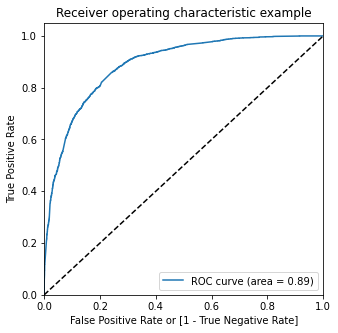

In [86]:
# Ploting the ROC curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

### Step-11: Finding the Optimal Cutoff  Point

When we balance Sensitivity and Specificity , we find the Optimal Cutoff

In [87]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.054302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.080939,0,1,0,0,0,0,0,0,0,0,0
2,0,0.648198,1,1,1,1,1,1,1,1,0,0,0
3,1,0.629808,1,1,1,1,1,1,1,1,0,0,0
4,1,0.915712,1,1,1,1,1,1,1,1,1,1,1


In [88]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.600535,0.984056,0.360307
0.2,0.2,0.767281,0.919052,0.672215
0.3,0.3,0.791057,0.873262,0.739565
0.4,0.4,0.809794,0.763696,0.838668
0.5,0.5,0.813573,0.699509,0.885019
0.6,0.6,0.806015,0.636958,0.911908
0.7,0.7,0.780350,0.517989,0.944686
0.8,0.8,0.761612,0.432952,0.967478
0.9,0.9,0.705716,0.255110,0.987964


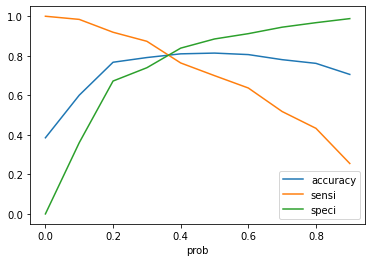

In [89]:
# Lets plot sensitivity and specificity 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the above Curve , we calculate 0.35 as the optimum point to take it as cutoff probability.

In [90]:
# Recalculating  

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.054302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.080939,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.648198,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.629808,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.915712,1,1,1,1,1,1,1,1,1,1,1,1


In [91]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8058573452999528

In [92]:
# Creating confusion matrix 
confusion1_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1_1

array([[3162,  743],
       [ 490, 1956]], dtype=int64)

In [93]:
# Substituting the value of true positive
TP = confusion1_1[1,1]
# Substituting the value of true negatives
TN = confusion1_1[0,0]
# Substituting the value of false positives
FP = confusion1_1[0,1] 
# Substituting the value of false negatives
FN = confusion1_1[1,0]

In [94]:
# Calculating the sensitivity
TP/(TP+FN)

0.7996729354047425

In [95]:
# Calculating the specificity
TN/(TN+FP)

0.809731113956466

### Step-12: Precision and Recall

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3456,  449],
       [ 735, 1711]], dtype=int64)

In [97]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7921296296296296

In [98]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6995094031071136

Precision and Recall Tradeoff

In [99]:
from sklearn.metrics import precision_recall_curve

In [100]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)


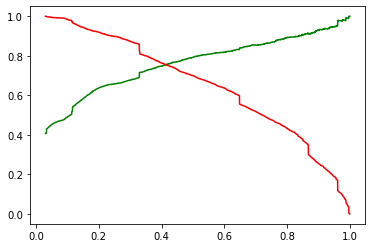

In [102]:
# Plotting

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.054302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.080939,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.648198,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.629808,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.915712,1,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8121555660525901

In [105]:
# Creating confusion matrix again
confusion2_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2_2

array([[3321,  584],
       [ 609, 1837]], dtype=int64)

In [106]:
# Substituting the value of true positive
TP = confusion2_2[1,1]
# Substituting the value of true negatives
TN = confusion2_2[0,0]
# Substituting the value of false positives
FP = confusion2_2[0,1] 
# Substituting the value of false negatives
FN = confusion2_2[1,0]

In [107]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7587773647253201

In [108]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7510220768601799

### Step:13- Predictions on Test Set

In [109]:
# Scaling the Numeric column

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits',
                                                                                                                'Page Views Per Visit',
                                                                                                                'Total Time Spent on Website']])


In [110]:
col = X_train.columns
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Country_Unknown,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What matters most to you in choosing a course_Unknown,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,0,0.015936,0.070530,0,0,0,0,0,0,1,0,0
1490,0,0.019920,0.679695,1,0,0,0,0,1,0,0,0
7936,0,0.007968,0.033243,0,0,0,0,0,0,1,0,0
4216,0,0.000000,0.000000,0,1,1,0,0,0,0,0,0
3830,0,0.031873,0.073675,1,0,0,0,0,0,1,0,0


In [111]:
# Adding Constant

X_test_sm = sm.add_constant(X_test)

In [112]:
# Making predictions on Test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.052703
1490    0.966573
7936    0.041647
4216    0.867525
3830    0.041942
1800    0.594489
6507    0.322298
4821    0.280455
4223    0.960961
4714    0.330611
dtype: float64

In [113]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.052703
1490,0.966573
7936,0.041647
4216,0.867525
3830,0.041942


In [114]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [115]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [116]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [117]:
y_pred_final.head()

,Converted,0
0,0,0.052703
1,1,0.966573
2,0,0.041647
3,1,0.867525
4,0,0.041942


In [118]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.052703
1,1,0.966573
2,0,0.041647
3,1,0.867525
4,0,0.041942


In [119]:
# Replacing 0 or 1 with the cut off as 0.5(if Conversion_prob>0.5 replace to 1 , else 0)

y_pred_final['Predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Probability,Predicted
0,0,0.052703,0
1,1,0.966573,1
2,0,0.041647,0
3,1,0.867525,1
4,0,0.041942,0
...,...,...,...
2718,0,0.128571,0
2719,0,0.242772,0
2720,1,0.877775,1
2721,0,0.070886,0


In [120]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)

0.8207858979067205

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted )
confusion2

array([[1488,  246],
       [ 242,  747]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7553083923154702

In [124]:
# Let us calculate specificity

TN / float(TN+FP)

0.8581314878892734

In [125]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7522658610271903

In [126]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7553083923154702

## Conclusion:


The variables that affects our lead mostly are the following:
1.The TotalVistits
2.The Total Time Spend on the Website
3.When the last activity was:
  a). SMS sent
  b). Olark Chat Conversation 
4.What is their current occupation_Working Professional	
5.When Lead Source_Welingak Website
